# RFM Segmentaion

**To get an indepth understanding of Customer Segmentation and its uses and also RFM Segmentation do visit this site [Introduction to Customer Segmentation](https://www.datacamp.com/community/tutorials/introduction-customer-segmentation-python)**

###  **First let's start with what customer segmentation is and why we would want to do customer segmentation.**

>__**`Customer Segmentation is a method of dividing customers into groups or clusters on the basis of common characterstics.`**__

> The need to do customer segmentation can be for a variety of reasons some are listed below.
- It will help in identifying the most potential customers.
- It will help managers to easily communicate with a targetted group of the audience.
- Improve customer relationship via better understanding needs of segments.
- It also helps in identifying new products that customers could be interested in.

### Now we have understood what customer segmentation is and why we want to use it let's move to RFM segmentation.

> **RFM segmentation** is a behavioural segmentation by 3 important features:
1. **Recency:** is the number of days since the last purchase.
2. **Frequency:** is the total number of transactions made by a customer over a given period of time.
3. **Monetary:** is the total amount of money spent by a customer over a given period of time.

### Now let's see how the steps to calculate RFM segmentation.

> **RFM Segmentation** steps:
1. Calculate the Recency, Frequency and Monetary values for each customer.
2. Add segment bin values to RFM table using quartile.
3. Sort the customers RFM score in ascending score.

## Let's move to coding..

In [1]:
# Import the neccessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import warnings 
import squarify
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
# We will now import the cleaned up and merged dataset
data = pd.read_csv(r"Exported datasets/all_customers_data.csv",
                   parse_dates=["transaction_date", "DOB", "product_first_sold_date"]) # we are specifying the date columns to be read as datetime objects.

In [3]:
# pandas shows 20 columns maximum by default, since our dataset have 29 column let's change that.
pd.options.display.max_columns = 29

In [4]:
# Viewing the top 5 rows.
data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,product_first_sold_date,...,gender,past_3_years_bike_related_purchases,DOB,age,age_categories,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,17.87,2012-12-02,...,M,19,1955-01-11,65,Above 60,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,984 Hoepker Court,3064,VIC,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,448.68,2003-02-07,...,M,19,1955-01-11,65,Above 60,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,984 Hoepker Court,3064,VIC,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,179.44,2010-11-05,...,M,19,1955-01-11,65,Above 60,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,984 Hoepker Court,3064,VIC,6
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,2014-03-03,...,F,89,1979-02-04,41,40 to 50,Clinical Specialist,Health,Mass Customer,Yes,10.0,4 Shopko Circle,2196,NSW,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,451.65,2011-04-16,...,F,89,1979-02-04,41,40 to 50,Clinical Specialist,Health,Mass Customer,Yes,10.0,4 Shopko Circle,2196,NSW,5


In [5]:
# To see the different data types and null values in each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18940 entries, 0 to 18939
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       18940 non-null  int64         
 1   product_id                           18940 non-null  int64         
 2   customer_id                          18940 non-null  int64         
 3   transaction_date                     18940 non-null  datetime64[ns]
 4   online_order                         18940 non-null  float64       
 5   order_status                         18940 non-null  object        
 6   brand                                18940 non-null  object        
 7   product_line                         18940 non-null  object        
 8   product_class                        18940 non-null  object        
 9   product_size                         18940 non-null  object        
 10  list_price

In [6]:
# To see a statstical description of the numerical columns.
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
transaction_id,18940.0,9985.967423,5776.077367,1.00,4984.75,9979.50,14984.25,20000.00
product_id,18940.0,45.786536,30.569274,0.00,18.00,45.00,72.00,100.00
customer_id,18940.0,1742.123865,1009.738090,1.00,863.00,1745.00,2616.00,3500.00
online_order,18940.0,0.500739,0.500013,0.00,0.00,1.00,1.00,1.00
list_price,18940.0,1105.438654,582.802668,12.01,575.27,1163.89,1577.53,2091.47
standard_cost,18940.0,555.334752,405.312069,7.21,215.14,507.58,795.10,1759.85
profit,18940.0,550.103901,492.587225,4.80,133.78,445.21,827.16,1702.55
past_3_years_bike_related_purchases,18940.0,48.900106,28.648531,0.00,24.00,48.00,73.00,99.00
age,18940.0,42.777402,12.518945,18.00,33.00,43.00,52.00,67.00
tenure,18940.0,10.678775,5.677322,1.00,6.00,11.00,15.00,22.00


In [7]:
data.shape # To see the shape of the dataset

(18940, 30)

**We won't do much of data cleaning because we have done that in the previous notebooks.**

###  Filter neccessary columns for RFM

In [8]:
data.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,product_first_sold_date,...,gender,past_3_years_bike_related_purchases,DOB,age,age_categories,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,17.87,2012-12-02,...,M,19,1955-01-11,65,Above 60,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,984 Hoepker Court,3064,VIC,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,448.68,2003-02-07,...,M,19,1955-01-11,65,Above 60,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,984 Hoepker Court,3064,VIC,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,179.44,2010-11-05,...,M,19,1955-01-11,65,Above 60,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,984 Hoepker Court,3064,VIC,6
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,2014-03-03,...,F,89,1979-02-04,41,40 to 50,Clinical Specialist,Health,Mass Customer,Yes,10.0,4 Shopko Circle,2196,NSW,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,451.65,2011-04-16,...,F,89,1979-02-04,41,40 to 50,Clinical Specialist,Health,Mass Customer,Yes,10.0,4 Shopko Circle,2196,NSW,5


- The columns we will need for the **RFM segmentation** are **Customer ID** which uniquely identifies a customer and we will use it to calculate **Frequency** of the customer, **Transaction date** which represents the date of purchase and we will use it to calculate **Recency** of the purchase and **List Price** which represents how much each customer have paid for and we will use it to calculate the **Monetaty** value each customer contributed.

In [9]:
df = data[["customer_id", "transaction_date", "list_price"]]
df

,customer_id,transaction_date,list_price
0,2950,2017-02-25,71.49
1,2950,2017-10-16,1403.50
2,2950,2017-04-26,478.16
3,3120,2017-05-21,2091.47
4,3120,2017-10-05,1129.13
...,...,...,...
18935,2764,2017-07-03,227.88
18936,3168,2017-02-21,441.49
18937,3168,2017-04-11,2083.94
18938,3168,2017-06-03,2091.47


In [10]:
df["transaction_date"].min(), df["transaction_date"].max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2017-12-30 00:00:00'))

- __The transaction data contains transaction data from January 1, 2017 to December 30, 2017. A year worth transaction.__

In [11]:
# We will use this day as a point in time to calculate recency..
snapshot_date = df["transaction_date"].max() + dt.timedelta(days=1)
snapshot_date

Timestamp('2017-12-31 00:00:00')

### RFM Analysis

- **To Calculate Recency we calculate the number of days between the snapshot date and the recent purchase of each customer.**
- **To Calculate Frequency we calculate the number of orders of each customers.**
- **To Calculate Monetary we sum all the purchase price for each customer.**

In [12]:
df.head()

,customer_id,transaction_date,list_price
0,2950,2017-02-25,71.49
1,2950,2017-10-16,1403.50
2,2950,2017-04-26,478.16
3,3120,2017-05-21,2091.47
4,3120,2017-10-05,1129.13


- __We will use the customer ID to group the customers by, we will use transaction date and list price to calculate recency and monetary respectively but we will need to calculate the frequency too. But how? well we can clone the customer id to calculate frequency. It'll make more sense later on.__

In [13]:
df["frequency"] = df.loc[:, "customer_id"]

In [14]:
df.head()

,customer_id,transaction_date,list_price,frequency
0,2950,2017-02-25,71.49,2950
1,2950,2017-10-16,1403.50,2950
2,2950,2017-04-26,478.16,2950
3,3120,2017-05-21,2091.47,3120
4,3120,2017-10-05,1129.13,3120


In [15]:
rfm = df.groupby('customer_id').agg({'transaction_date': lambda date: (snapshot_date - date.max()).days,
                                        'frequency': lambda num: len(num),
                                        'list_price': lambda price: price.sum()}).rename(columns={"transaction_date": "Recency",
                                                                                        "frequency": "Frequency", 
                                                                                        "list_price": "Monetary"})

In [16]:
rfm

,Recency,Frequency,Monetary
customer_id,,,
1,8,11,9084.45
2,129,3,4149.07
4,196,2,1047.72
5,17,6,5903.20
6,65,5,5931.69
...,...,...,...
3496,257,4,4725.38
3497,53,3,3744.07
3498,128,6,5177.06


- We have now 3404 customer records grouped by their Recency of the purchase, Frequency by their quantity and Monetary by the monetary value of the purchases. Now we will calculate the quantile values for the RFM values.

### Computing Quantile of RFM values.

- __Customers who bought recently i.e small recency value, Customers who visit frequently i.e high frequency value and customers who who contribute high monetary value i.e high monetary value are considered top customers.__

- **Data discretization is defined as a process of converting continuous data attribute values into a finite set of intervals and associating with each interval some specific data value.**

In [17]:
# qcut is Quantile-based discretization function
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(rfm['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(rfm['Frequency'], q=4, labels=f_labels)
# Create new columns R and F 
rfm = rfm.assign(R = r_groups.values, F = f_groups.values)
rfm.head()

,Recency,Frequency,Monetary,R,F
customer_id,,,,,
1,8,11,9084.45,4,4
2,129,3,4149.07,1,1
4,196,2,1047.72,1,1
5,17,6,5903.20,4,3
6,65,5,5931.69,2,2


In [18]:
# Create labels for MonetaryValue
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(rfm['Monetary'], q=4, labels=m_labels)
# Create new column M
rfm = rfm.assign(M = m_groups.values)

In [19]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M
customer_id,,,,,,
1,8,11,9084.45,4,4,4
2,129,3,4149.07,1,1,2
4,196,2,1047.72,1,1,1
5,17,6,5903.20,4,3,3
6,65,5,5931.69,2,2,3


### RFM Result Interpretation

- **Combine all three quartiles(R,F,M) in a single column to create RFM segments.**

In [20]:
rfm["RFM"] = rfm.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis=1)

In [21]:
rfm

,Recency,Frequency,Monetary,R,F,M,RFM
customer_id,,,,,,,
1,8,11,9084.45,4,4,4,444
2,129,3,4149.07,1,1,2,112
4,196,2,1047.72,1,1,1,111
5,17,6,5903.20,4,3,3,433
6,65,5,5931.69,2,2,3,223
...,...,...,...,...,...,...,...
3496,257,4,4725.38,1,1,2,112
3497,53,3,3744.07,2,1,1,211
3498,128,6,5177.06,1,3,2,132


- __We have now concatenated the R,F and M values to one so let's move to segmentation....__

In [22]:
len(rfm["RFM"].unique())

56

- __What? 56 unique values? That's not practicable for segmentation, we will need a more concise way to define our segments.__

### We can approach this problem in different ways but the simplest and obvious one is to sum the scores to a single number and define RFM levels for each score.

In [23]:
rfm["RFM_score"] = rfm[["R", "F", "M"]].sum(axis=1)

In [24]:
rfm

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_score
customer_id,,,,,,,,
1,8,11,9084.45,4,4,4,444,12.0
2,129,3,4149.07,1,1,2,112,4.0
4,196,2,1047.72,1,1,1,111,3.0
5,17,6,5903.20,4,3,3,433,10.0
6,65,5,5931.69,2,2,3,223,7.0
...,...,...,...,...,...,...,...,...
3496,257,4,4725.38,1,1,2,112,4.0
3497,53,3,3744.07,2,1,1,211,4.0
3498,128,6,5177.06,1,3,2,132,6.0


- __We can define what each RFM score range entails, we will use some common segment names.__

In [25]:
# Define a function to give rfm levels to customers
def rfm_level(df):
    if df['RFM_score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_score'] >= 8) and (df['RFM_score'] < 9)):
        return 'Champions'
    elif ((df['RFM_score'] >= 7) and (df['RFM_score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_score'] >= 6) and (df['RFM_score'] < 7)):
        return 'Potential'
    elif ((df['RFM_score'] >= 5) and (df['RFM_score'] < 6)):
        return 'Promising'
    elif ((df['RFM_score'] >= 4) and (df['RFM_score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'

In [26]:
# Applying the function 
rfm["RFM_level"] = rfm.apply(rfm_level, axis=1)

In [27]:
rfm

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_score,RFM_level
customer_id,,,,,,,,,
1,8,11,9084.45,4,4,4,444,12.0,Can't Loose Them
2,129,3,4149.07,1,1,2,112,4.0,Needs Attention
4,196,2,1047.72,1,1,1,111,3.0,Require Activation
5,17,6,5903.20,4,3,3,433,10.0,Can't Loose Them
6,65,5,5931.69,2,2,3,223,7.0,Loyal
...,...,...,...,...,...,...,...,...,...
3496,257,4,4725.38,1,1,2,112,4.0,Needs Attention
3497,53,3,3744.07,2,1,1,211,4.0,Needs Attention
3498,128,6,5177.06,1,3,2,132,6.0,Potential


### Let's see some statstical description about the various RFM levels.

In [28]:
rfm.groupby("RFM_level").agg({
    'Recency': ["min", 'mean', "max"],
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']})

Recency                  Frequency     Monetary      
                       min        mean  max      mean         mean count
RFM_level                                                               
Can't Loose Them         1   29.895367  161  7.753195  8896.503682  1252
Champions                1   52.363636  219  5.909091  6436.956591   396
Loyal                    1   59.474934  279  5.226913  5596.951530   379
Needs Attention         47  103.730769  278  3.362179  3615.438526   312
Potential                1   59.300000  294  4.343902  4634.339829   410
Promising               20   71.527950  259  3.832298  4035.684130   322
Require Activation      89  168.882883  354  2.546547  2404.563393   333

- **Can't Loose Them:** This customer segments in our dataset have an average recency of 30, average frequency of 8 and an average monetary value of 8900.There are 1252 customers that are segmented in this class.

- **Champions:** This customer segments in our dataset have an average recency of 52, average frequency of 6 and an average monetary value of 6500.There are 396 customers that are segmented in this class.

- **Loyal:** This customer segments in our dataset have an average recency of 60, average frequency of 5 and an average monetary value of 5600.There are 379 customers that are segmented in this class.

- **Potential:** This customer segments in our dataset have an average recency of 60, average frequency of 4 and an average monetary value of 4600.There are 410 customers that are segmented in this class.

- **Promising:** This customer segments in our dataset have an average recency of 71, average frequency of 4 and an average monetary value of 4035.There are 322 customers that are segmented in this class.

- **Needs Attention:** This customer segments in our dataset have an average recency of 104, average frequency of 3 and an average monetary value of 3600.There are 312 customers that are segmented in this class.

- **Require Activation:** This customer segments in our dataset have an average recency of 168, average frequency of 2 and an average monetary value of 2400.There are 333 customers that are segmented in this class.

## Let's do some visualization on the RFM groups

In [29]:
rfm["RFM_level"].value_counts(normalize=True)

Can't Loose Them      0.367803
Potential             0.120447
Champions             0.116334
Loyal                 0.111340
Require Activation    0.097826
Promising             0.094595
Needs Attention       0.091657
Name: RFM_level, dtype: float64

In [30]:
["Can't Loose Them (36.7%)", "Potential (12%)", "Champions (11%)", "Loyal (11%)",
 "Require Activation (9.7%)", "Promising (9%.5)", "Needs Attention (9.1%)"]

["Can't Loose Them (36.7%)",
 'Potential (12%)',
 'Champions (11%)',
 'Loyal (11%)',
 'Require Activation (9.7%)',
 'Promising (9%.5)',
 'Needs Attention (9.1%)']

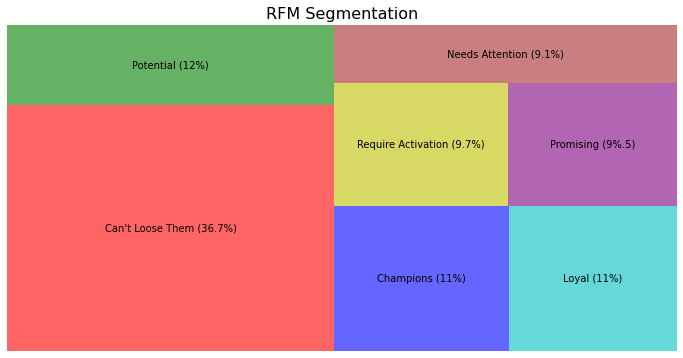

In [31]:
plt.rcParams["figure.figsize"] = 12, 6
squarify.plot(sizes=rfm["RFM_level"].value_counts().values,
             label=["Can't Loose Them (36.7%)", "Potential (12%)", "Champions (11%)", "Loyal (11%)",
                    "Require Activation (9.7%)", "Promising (9%.5)", "Needs Attention (9.1%)"],
             alpha=.6, color=["r","g","b","c","y","purple","brown"])

plt.title("RFM Segmentation", size=16)

plt.axis("off")
plt.show()

- __60% of our customers are in the top tier of the RFM levels! That's great, the store is doing something to keep the customers loyal and make them come back to the store a number of times.__

- **We will need to do something about the other 40% customers:**
1. **Potential** — high potential to enter our loyal customer segments, why not throw in some freebies on their next purchase to show that you value them! 
2. **Promising** — showing promising signs with quantity and value of their purchase but it has been a while since they last bought sometime from you. Let’s target them with their wishlist items and a limited time offer discount.
3. **Needs Attention** — made some initial purchase but have not seen them since. Was it a bad customer experience? Or product-market fit? Let’s spend some resource build our brand awareness with them.
4. **Require Activation** — Poorest performers of our RFM model. They might have went with our competitors for now and will require a different activation strategy to win them back.

In [32]:
rfm

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_score,RFM_level
customer_id,,,,,,,,,
1,8,11,9084.45,4,4,4,444,12.0,Can't Loose Them
2,129,3,4149.07,1,1,2,112,4.0,Needs Attention
4,196,2,1047.72,1,1,1,111,3.0,Require Activation
5,17,6,5903.20,4,3,3,433,10.0,Can't Loose Them
6,65,5,5931.69,2,2,3,223,7.0,Loyal
...,...,...,...,...,...,...,...,...,...
3496,257,4,4725.38,1,1,2,112,4.0,Needs Attention
3497,53,3,3744.07,2,1,1,211,4.0,Needs Attention
3498,128,6,5177.06,1,3,2,132,6.0,Potential


In [33]:
rfm[["RFM_level"]].to_csv(r"Exported Datasets/RFM_levels.csv")